**Unzipping and Loading Dataset**

In [14]:
import zipfile
import os


zip_file_path = "Plant Disease.zip"
extract_dir = "/content"

if os.path.exists(zip_file_path):
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print("Zip file extracted successfully.")
    except Exception as e:
        print(f"Error extracting zip file: {e}")
else:
    print("Zip file not found.")

Zip file extracted successfully.


**Import Libraries**

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

**Data Preprocessing**

In [28]:
D:\Green Skills Internship\PLant_Disease_Prediction\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train

In [36]:
import os

# Path to the directory
directory_path = 'D:/Green Skills Internship/PLant_Disease_Prediction/train'

# Check if the path exists
print(os.path.exists(directory_path))  # Should return True if path exists

# Optionally list the files inside the folder
if os.path.exists(directory_path):
    print(os.listdir(directory_path))  # List the files/folders inside the train directory


True
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_m

In [37]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'D:/Green Skills Internship/PLant_Disease_Prediction/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70243 files belonging to 38 classes.


In [38]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [39]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'D:/Green Skills Internship/PLant_Disease_Prediction/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17557 files belonging to 38 classes.


**Model Building**
(CNN layer and Maxpooling layer)

In [41]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters= 32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters= 32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters= 64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters= 64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters= 128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters= 128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters= 256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters= 256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters= 512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters= 512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Dropout(0.25)) #Avoid Overfiiting

model.add(Flatten())

model.add(Dense(units=1500, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(units=38, activation='softmax'))

**Compiling Model**

In [42]:
model.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

**Model Training**

In [43]:
training_history = model.fit(x = training_set, validation_data = validation_set, epochs=10)

Epoch 1/10
2196/2196 [==============================] - 260s 95ms/step - loss: 1.3238 - accuracy: 0.6111 - val_loss: 0.4816 - val_accuracy: 0.8476
Epoch 2/10
2196/2196 [==============================] - 184s 84ms/step - loss: 0.4243 - accuracy: 0.8674 - val_loss: 0.3378 - val_accuracy: 0.8900
Epoch 3/10
2196/2196 [==============================] - 211s 96ms/step - loss: 0.2574 - accuracy: 0.9173 - val_loss: 0.2281 - val_accuracy: 0.9276
Epoch 4/10
2196/2196 [==============================] - 203s 92ms/step - loss: 0.1782 - accuracy: 0.9424 - val_loss: 0.1554 - val_accuracy: 0.9510
Epoch 5/10
2196/2196 [==============================] - 199s 90ms/step - loss: 0.1345 - accuracy: 0.9557 - val_loss: 0.2054 - val_accuracy: 0.9373
Epoch 6/10
2196/2196 [==============================] - 199s 91ms/step - loss: 0.1062 - accuracy: 0.9655 - val_loss: 0.1508 - val_accuracy: 0.9538
Epoch 7/10
2196/2196 [==============================] - 202s 92ms/step - loss: 0.0865 - accuracy: 0.9716 - val_loss: 0

**Model Evaluation Training Set**

In [44]:
train_loss, train_acc = model.evaluate(training_set)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_acc)

2196/2196 [==============================] - 69s 31ms/step - loss: 0.0294 - accuracy: 0.9904
Training Loss: 0.02939605340361595
Training Accuracy: 0.9904047250747681


**Model Evaluation Validation Set**

In [45]:
val_loss, val_acc = model.evaluate(validation_set)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

549/549 [==============================] - 13s 23ms/step - loss: 0.1273 - accuracy: 0.9653
Validation Loss: 0.1272946447134018
Validation Accuracy: 0.9653129577636719


**Save Model**

In [48]:
model.save('plant_disease_trained_model.h5')

**Save Training History**

In [49]:
import json
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

In [50]:
training_history.history

{'loss': [1.3237948417663574,
  0.42433008551597595,
  0.257413774728775,
  0.1781807541847229,
  0.1344640851020813,
  0.1062229797244072,
  0.08646151423454285,
  0.07150884717702866,
  0.05900083854794502,
  0.05715421587228775],
 'accuracy': [0.6110644340515137,
  0.8673746585845947,
  0.9172586798667908,
  0.9423999786376953,
  0.9557393789291382,
  0.9654627442359924,
  0.9715985655784607,
  0.9766097664833069,
  0.980567455291748,
  0.9818772077560425],
 'val_loss': [0.4816214144229889,
  0.33778515458106995,
  0.2280762642621994,
  0.15536212921142578,
  0.20542554557323456,
  0.15081126987934113,
  0.10989201813936234,
  0.11951512843370438,
  0.1312151849269867,
  0.1272946298122406],
 'val_accuracy': [0.8476391434669495,
  0.8900153636932373,
  0.9275502562522888,
  0.9509597420692444,
  0.9372899532318115,
  0.9537506699562073,
  0.9665091037750244,
  0.9671925902366638,
  0.9596172571182251,
  0.9653129577636719]}

**Accuracy Visualization**

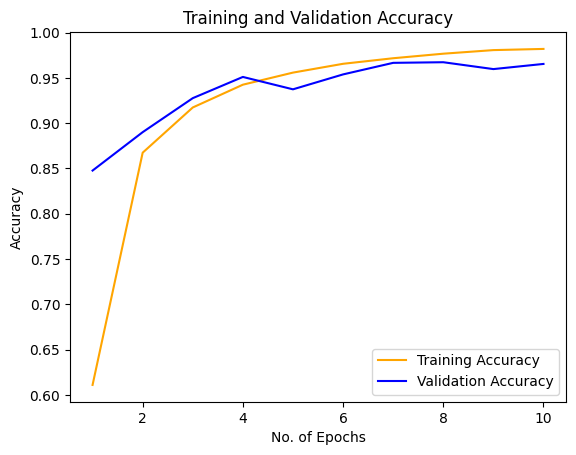

In [51]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='orange', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

**Metrices for Model Evaluation**

In [52]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [56]:

test_set = tf.keras.utils.image_dataset_from_directory(
    'D:/Green Skills Internship/PLant_Disease_Prediction/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17557 files belonging to 38 classes.


In [57]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

17557/17557 [==============================] - 66s 4ms/step


(array([[9.5031583e-01, 4.9566705e-02, 3.0004176e-06, ..., 2.9406841e-10,
         1.3479524e-09, 1.5809746e-08],
        [9.3048954e-01, 6.9493033e-02, 7.4582509e-08, ..., 1.4988646e-13,
         4.6381722e-12, 1.7947319e-12],
        [9.9999976e-01, 2.0576162e-07, 1.5695230e-10, ..., 2.9296019e-16,
         1.3913699e-13, 3.9416543e-12],
        ...,
        [1.2058342e-12, 5.2194594e-14, 1.8751480e-10, ..., 4.3776892e-14,
         5.1850413e-13, 1.0000000e+00],
        [9.1695846e-13, 2.0785309e-14, 9.8888528e-12, ..., 1.0933584e-12,
         3.3925569e-12, 1.0000000e+00],
        [6.9417730e-15, 8.1937372e-16, 1.5954114e-13, ..., 2.2042463e-16,
         3.2970453e-13, 1.0000000e+00]], dtype=float32),
 (17557, 38))

In [58]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17557,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [59]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17557,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.87      0.93       504
                                 Apple___Black_rot       0.91      0.99      0.95       497
                          Apple___Cedar_apple_rust       1.00      0.92      0.95       440
                                   Apple___healthy       1.00      0.91      0.95       502
                               Blueberry___healthy       0.93      0.96      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.95      0.92       395
                       Corn_(maize)___Common_rust_       1.00      0.97      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.93      0.

**Confusion Matrix Visualization**

Text(0.5, 1.0, 'Confusion Matrix')

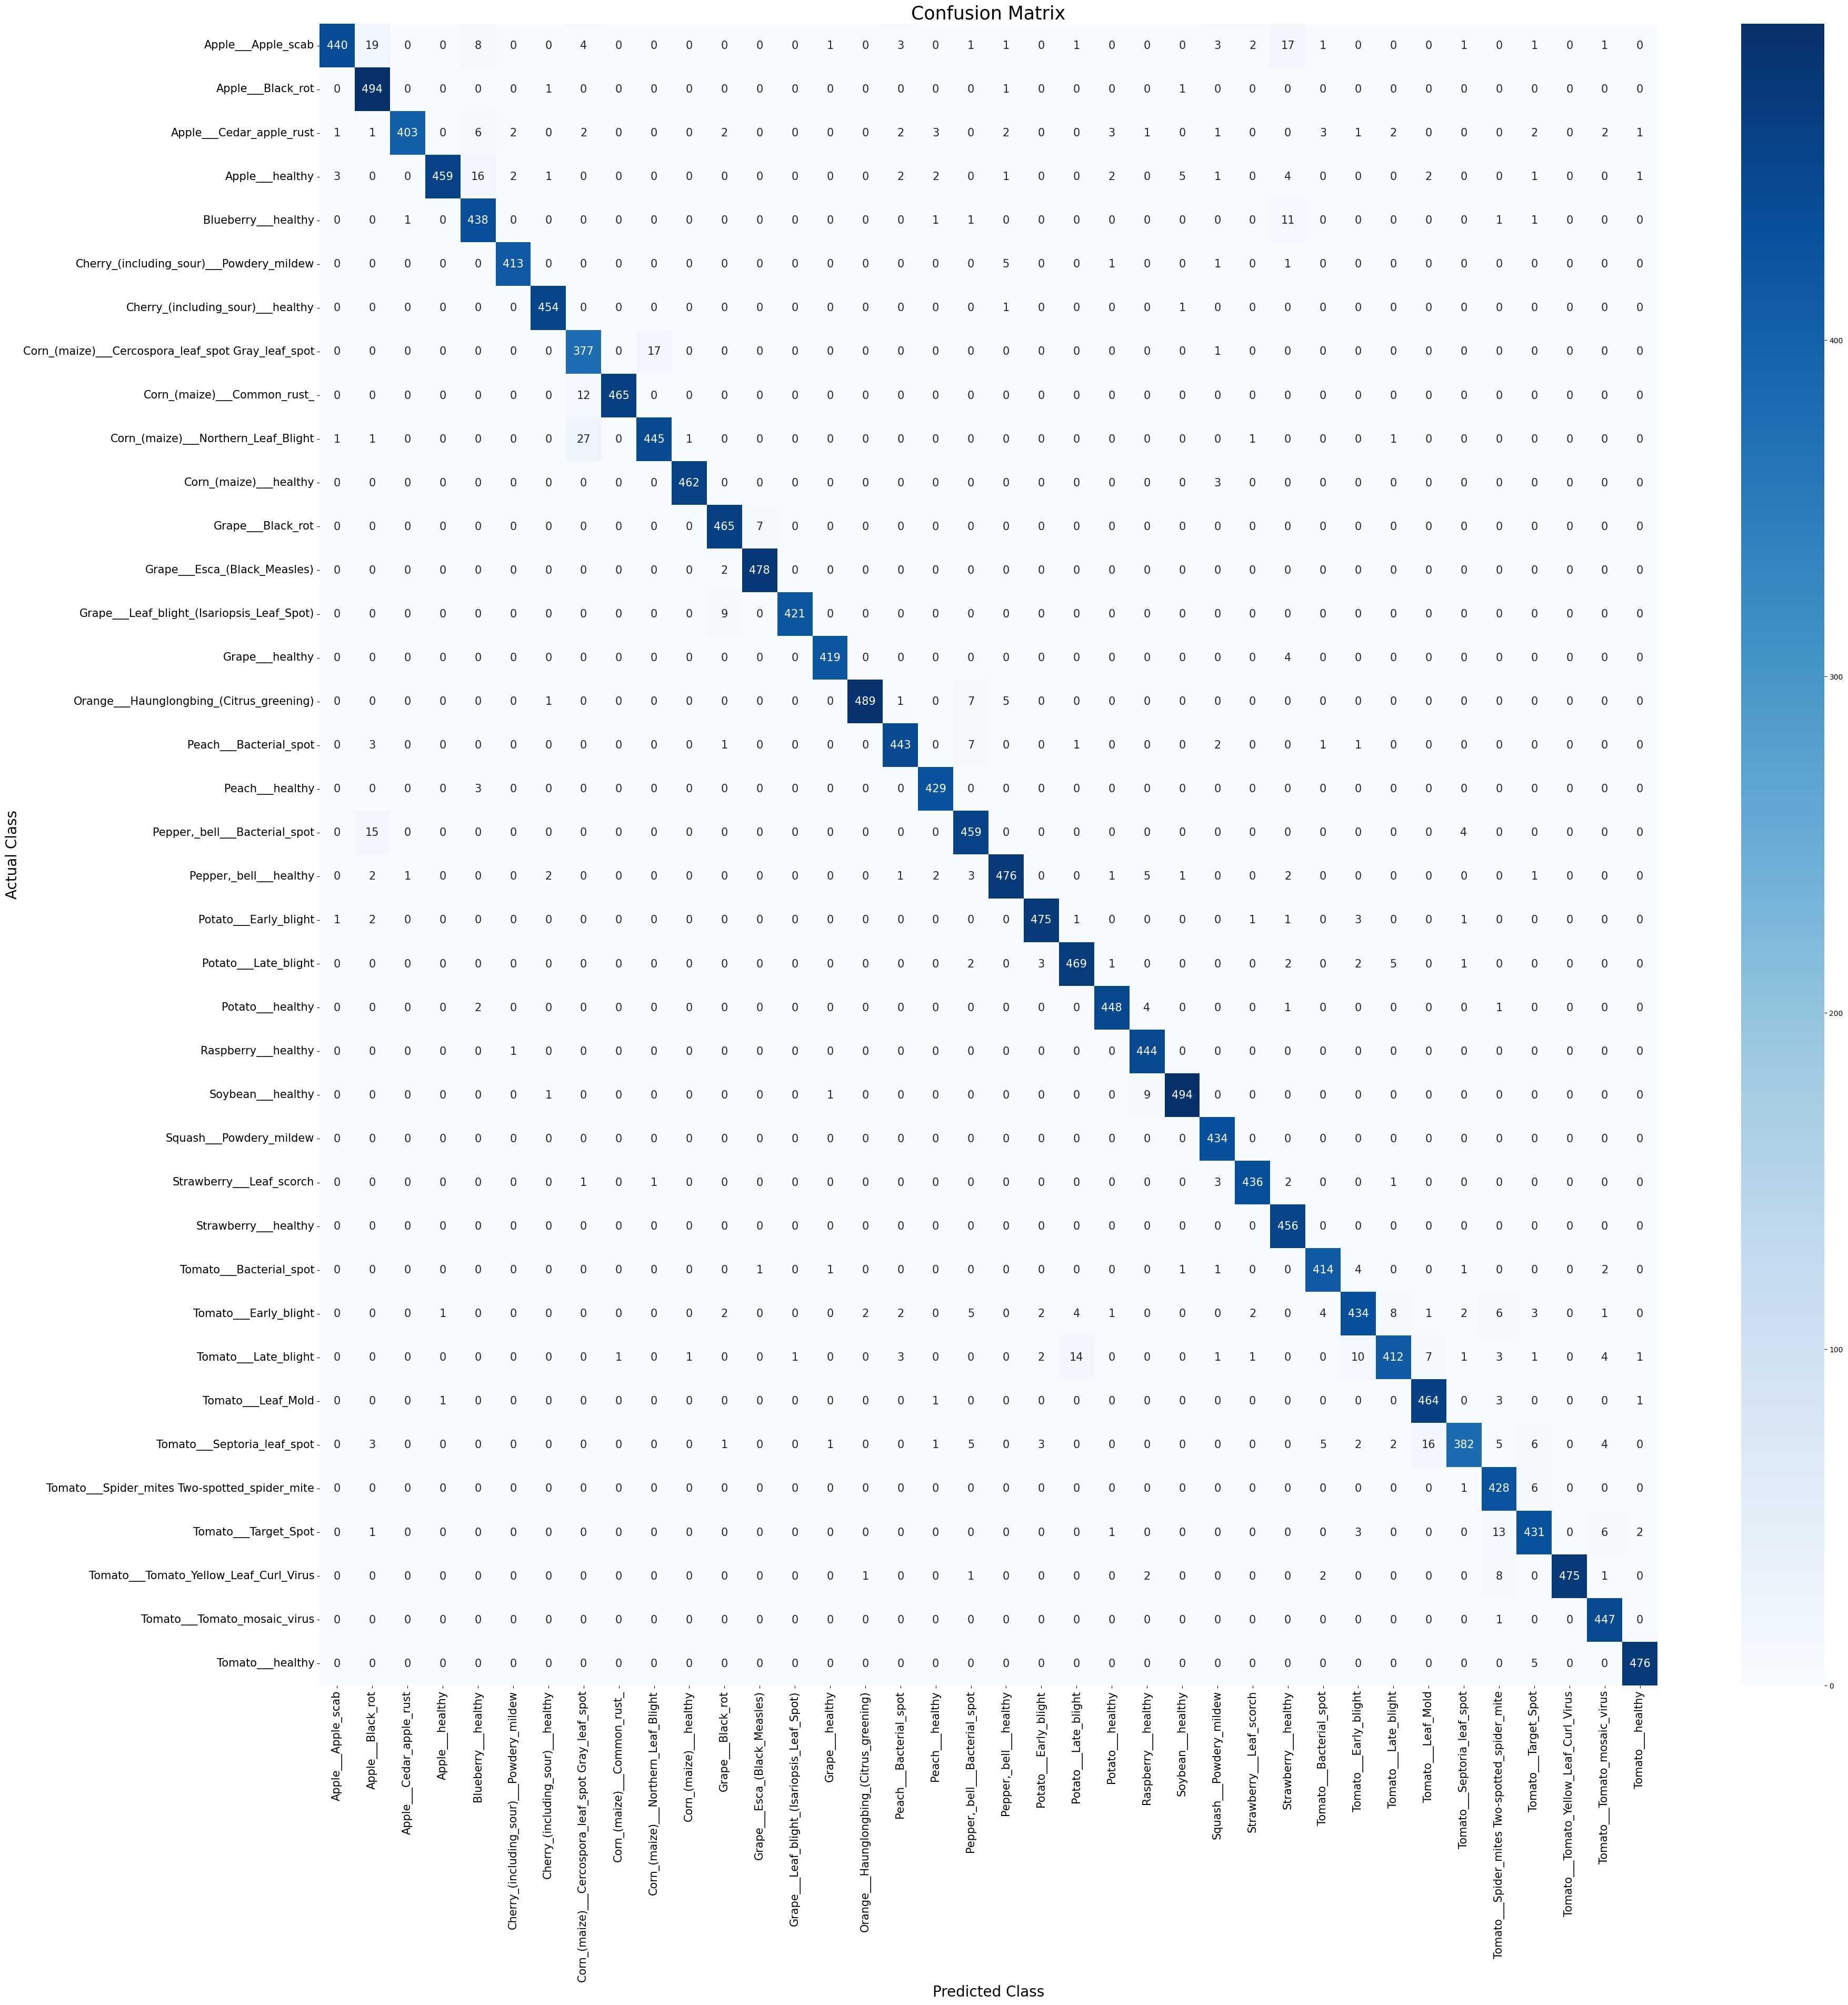

In [61]:
cm = confusion_matrix(Y_true, predicted_categories)
plt.figure(figsize=(41, 41))
sns.heatmap(cm, annot=True, fmt='d',annot_kws={'size':15}, cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Confusion Matrix',fontsize=25)